<h1>Data Scraping From Avito.ma</h1>

<p>Made by: Mabrouk Ziyad <strong>&</strong> Quehlaoui Mohamed</p>
<p>Supervised by: Pr. El Asri Ikram</p>

<h3>Import Necessary Librairies:</h3>

In [1]:
import csv
import pandas as pd
from time import sleep
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

<h3>Prepare driver for Selenium:</h3>

In [55]:
brave_path = r"C:\Program Files\BraveSoftware\Brave-Browser\Application\brave.exe"
webdriver_path = './chromedriver.exe'
options = webdriver.ChromeOptions()
# Add the --enable-chrome-browser-cloud-management flag to avoid an error
options.add_argument('--enable-chrome-browser-cloud-management')
options.binary_location = brave_path
service = Service(webdriver_path)
driver = webdriver.Chrome(service=service, options=options)

<h3>Access the website (avito.ma):</h3>

In [3]:
driver.get("https://www.avito.ma/fr/maroc/voitures_d_occasion-%C3%A0_vendre")

<h3>Get listings' links for the entire page:</h3>

In [4]:
listings = driver.find_elements(By.XPATH, '//div[@class="sc-1nre5ec-1 crKvIr listing"]/a')
len(listings)

35

In [5]:
article_links = []
for listing in listings:
    print(listing.get_attribute('href'))
    article_links.append(listing.get_attribute('href'))

https://www.avito.ma/fr/bourgogne/voitures_d'occasion/Lexus_LX_Essence_Automatique_2010_%C3%A0_Casablanca_45242514.htm
https://www.avito.ma/fr/2_mars/voitures_d'occasion/BMW_S%C3%A9rie_1_Diesel_Manuelle_2009_%C3%A0_Casablanca_54538226.htm
https://www.avito.ma/fr/belv%C3%A9d%C3%A8re/voitures_d'occasion/Ford_Kuga_Diesel_Manuelle_2016_%C3%A0_Casablanca_37627750.htm
https://www.avito.ma/fr/2_mars/voitures_d'occasion/Kia_Rio_Essence_Manuelle_2008_%C3%A0_Casablanca_52530569.htm
https://www.avito.ma/fr/a%C3%AFn_chock/voitures_d'occasion/Mercedes_classe_Ml_Diesel__49336734.htm
https://www.avito.ma/fr/a%C3%AFn_chock/voitures_d'occasion/Volkswagen_Tiguan_R_line_allemande_2015_52006664.htm
https://www.avito.ma/fr/a%C3%AFn_chock/voitures_d'occasion/Volkswagen_Passat_Diesel_Automatique_2022_54684619.htm
https://www.avito.ma/fr/bourgogne/voitures_d'occasion/CITRO%C3%8BN_NEMO_PREMIERE_MAIN_54413846.htm
https://www.avito.ma/fr/belv%C3%A9d%C3%A8re/voitures_d'occasion/Audi_Q5_Diesel_Automatique_2019_%C3

<h3>Go to the next page:</h3>

In [6]:
next_page = driver.find_elements(By.XPATH, '//div[@class="sc-2y0ggl-0 hInuCx"]/a')[-1]
next_page.click()

In [7]:
num_pages = driver.find_elements(By.XPATH, '//div[@class="sc-2y0ggl-0 hInuCx"]/a')[-2]
num_pages.text

'2671'

<h5>There is 2671 pages of results, each with 35 listings!</h5>

In [10]:
article_links[0]

"https://www.avito.ma/fr/bourgogne/voitures_d'occasion/Lexus_LX_Essence_Automatique_2010_%C3%A0_Casablanca_45242514.htm"

<h3>Accessing the listing's link and collecting the informations:</h3>

In [56]:
driver.get(article_links[0])

In [57]:
title = driver.find_element(By.XPATH, '//div[@class="sc-1g3sn3w-9 kvOteU"]/h1').text
title

'Toyota Corolla Hybride Automatique 2019 à Tétouan'

In [58]:
price = driver.find_element(By.XPATH, '//div[@class="sc-1g3sn3w-10 leGvyq"]/p').text
price

'205\u202f000 DH'

In [59]:
city = driver.find_element(By.XPATH, '//span[@class="sc-1x0vz2r-0 iotEHk"]').text
city

'Tétouan'

In [65]:
infos = driver.find_elements(By.XPATH, '//span[@class="sc-1x0vz2r-0 kQHNss"]')
infos = [info.text for info in infos]
carburant = None
boite_vitesse = None
puissance_fiscale = None

for info in infos:
    if 'Automatique' in info:
        boite_vitesse = 'Automatique'
    elif 'Manuelle' in info:
        boite_vitesse = 'Manuelle'

    if 'Essence' in info:
        carburant = 'Essence'
    elif 'Diesel' in info:
        carburant = 'Diesel'
    elif 'Hybride' in info:
        carburant = 'Hybride'

    if 'CV' in info:
        puissance_fiscale = info

carburant, boite_vitesse, puissance_fiscale


('Hybride', 'Automatique', '8 CV')

In [63]:
other_infos_titles = driver.find_elements(By.XPATH, '//span[@class="sc-1x0vz2r-0 jZyObG"]')
other_infos_titles = [info.text for info in other_infos_titles]

other_infos_values = driver.find_elements(By.XPATH, '//span[@class="sc-1x0vz2r-0 gSLYtF"]')
other_infos_values = [info.text for info in other_infos_values]

other_infos = dict(zip(other_infos_titles, other_infos_values))
other_infos

{'Type': "Voitures d'occasion, à vendre",
 'Secteur': 'Safir',
 'Origine': 'WW au Maroc',
 'État': 'Neuf',
 'Marque': 'Toyota',
 'Modèle': 'Corolla',
 'Année-Modèle': '2019',
 'Nombre de portes': '5',
 'Première main': 'Non',
 'Kilométrage': '50 000 - 54 999'}

In [62]:
Equipements = driver.find_elements(By.XPATH, '//span[@class="sc-1x0vz2r-0 bXFCIH"]')
Equipements = [info.text for info in Equipements]
Equipements

['Système De Navigation/GPS',
 'Verrouillage Centralisé À Distance',
 'Airbags',
 'Caméra De Recul',
 'Vitres Électriques',
 'Régulateur De Vitesse',
 'Ordinateur De Bord',
 'Radar De Recul',
 'Jantes Aluminium',
 'Toit Ouvrant',
 'CD/MP3/Bluetooth',
 'ABS',
 'Climatisation',
 'Limiteur De Vitesse',
 'ESP']

In [61]:
seller = driver.find_element(By.XPATH, '//p[@class="sc-1x0vz2r-0 fUTtTl sc-1l0do2b-9 bkvpcU"]').text
seller

'auto confort 44'

In [69]:
imgs_number = driver.find_element(By.XPATH, '//p[@class="sc-1x0vz2r-0 gHEfHI sc-10jmm47-1 eLMGru"]').text
imgs_number

'9 Images'

<h3>Create CSV file based on these informations:</h3>

In [70]:
csv_file = open('avito_data.csv', 'w', newline='', encoding='utf-8')
csv_writer = csv.writer(csv_file)
header = ['Titre','Vendeur','Prix','Ville','Carburant','Boite à vitesses','Puissance Fiscale', 'Nombre des images'] + other_infos_titles + ['Equipements']
csv_writer.writerow(header)
header

['Titre',
 'Vendeur',
 'Prix',
 'Ville',
 'Carburant',
 'Boite à vitesses',
 'Puissance Fiscale',
 'Nombre des images',
 'Type',
 'Secteur',
 'Origine',
 'État',
 'Marque',
 'Modèle',
 'Année-Modèle',
 'Nombre de portes',
 'Première main',
 'Kilométrage',
 'Equipements']

<h3>Writing the first row of data:</h3>

In [73]:
data = [title, seller, price, city, carburant, boite_vitesse, puissance_fiscale, imgs_number] + [other_infos['Type']] + [other_infos['Secteur']] + [other_infos['Origine']] + [other_infos['État']] + [other_infos['Marque']] + [other_infos['Modèle']] + [other_infos['Année-Modèle']] + [other_infos['Nombre de portes']] + [other_infos['Première main']] + [other_infos['Kilométrage']]+ [Equipements]
csv_writer.writerow(data)
csv_file.flush()

In [74]:
dataset = pd.read_csv('avito_data.csv')
dataset

,Titre,Vendeur,Prix,Ville,Carburant,Boite à vitesses,Puissance Fiscale,Nombre des images,Type,Secteur,Origine,État,Marque,Modèle,Année-Modèle,Nombre de portes,Première main,Kilométrage,Equipements
0,Toyota Corolla Hybride Automatique 2019 à Tétouan,auto confort 44,205 000 DH,Tétouan,Hybride,Automatique,8 CV,9 Images,"Voitures d'occasion, à vendre",Safir,WW au Maroc,Neuf,Toyota,Corolla,2019,5,Non,50 000 - 54 999,"['Système De Navigation/GPS', 'Verrouillage Ce..."


<h3>Collecting the remaining links:</h3>

In [51]:
driver.get('https://www.avito.ma/fr/maroc/voitures_d_occasion-%C3%A0_vendre')

<h5>For time reasons, we will only stop at 100 pages!</h5>

In [52]:
listings, article_links = [], []
for i in range(100):
    print("page number: ", i+1)
    
    listings = driver.find_elements(By.XPATH, '//div[@class="sc-1nre5ec-1 crKvIr listing"]/a')

    for listing in listings:
        article_links.append(listing.get_attribute('href'))
    
    next_page = driver.find_elements(By.XPATH, '//div[@class="sc-2y0ggl-0 hInuCx"]/a')[-1]
    next_page.click()

page number:  1
page number:  2
page number:  3
page number:  4
page number:  5
page number:  6
page number:  7
page number:  8
page number:  9
page number:  10
page number:  11
page number:  12
page number:  13
page number:  14
page number:  15
page number:  16
page number:  17
page number:  18
page number:  19
page number:  20
page number:  21
page number:  22
page number:  23
page number:  24
page number:  25
page number:  26
page number:  27
page number:  28
page number:  29
page number:  30
page number:  31
page number:  32
page number:  33
page number:  34
page number:  35
page number:  36
page number:  37
page number:  38
page number:  39
page number:  40
page number:  41
page number:  42
page number:  43
page number:  44
page number:  45
page number:  46
page number:  47
page number:  48
page number:  49
page number:  50
page number:  51
page number:  52
page number:  53
page number:  54
page number:  55
page number:  56
page number:  57
page number:  58
page number:  59
page n

<h3>Collecting data for each link, and adding it into the CSV file:</h3>

<h5>To avoid getting banned, we need to wait a random amount of time before accessing the next link!</h5>

![Screenshot 2024-03-19 213954.png](<attachment:Screenshot 2024-03-19 213954.png>)
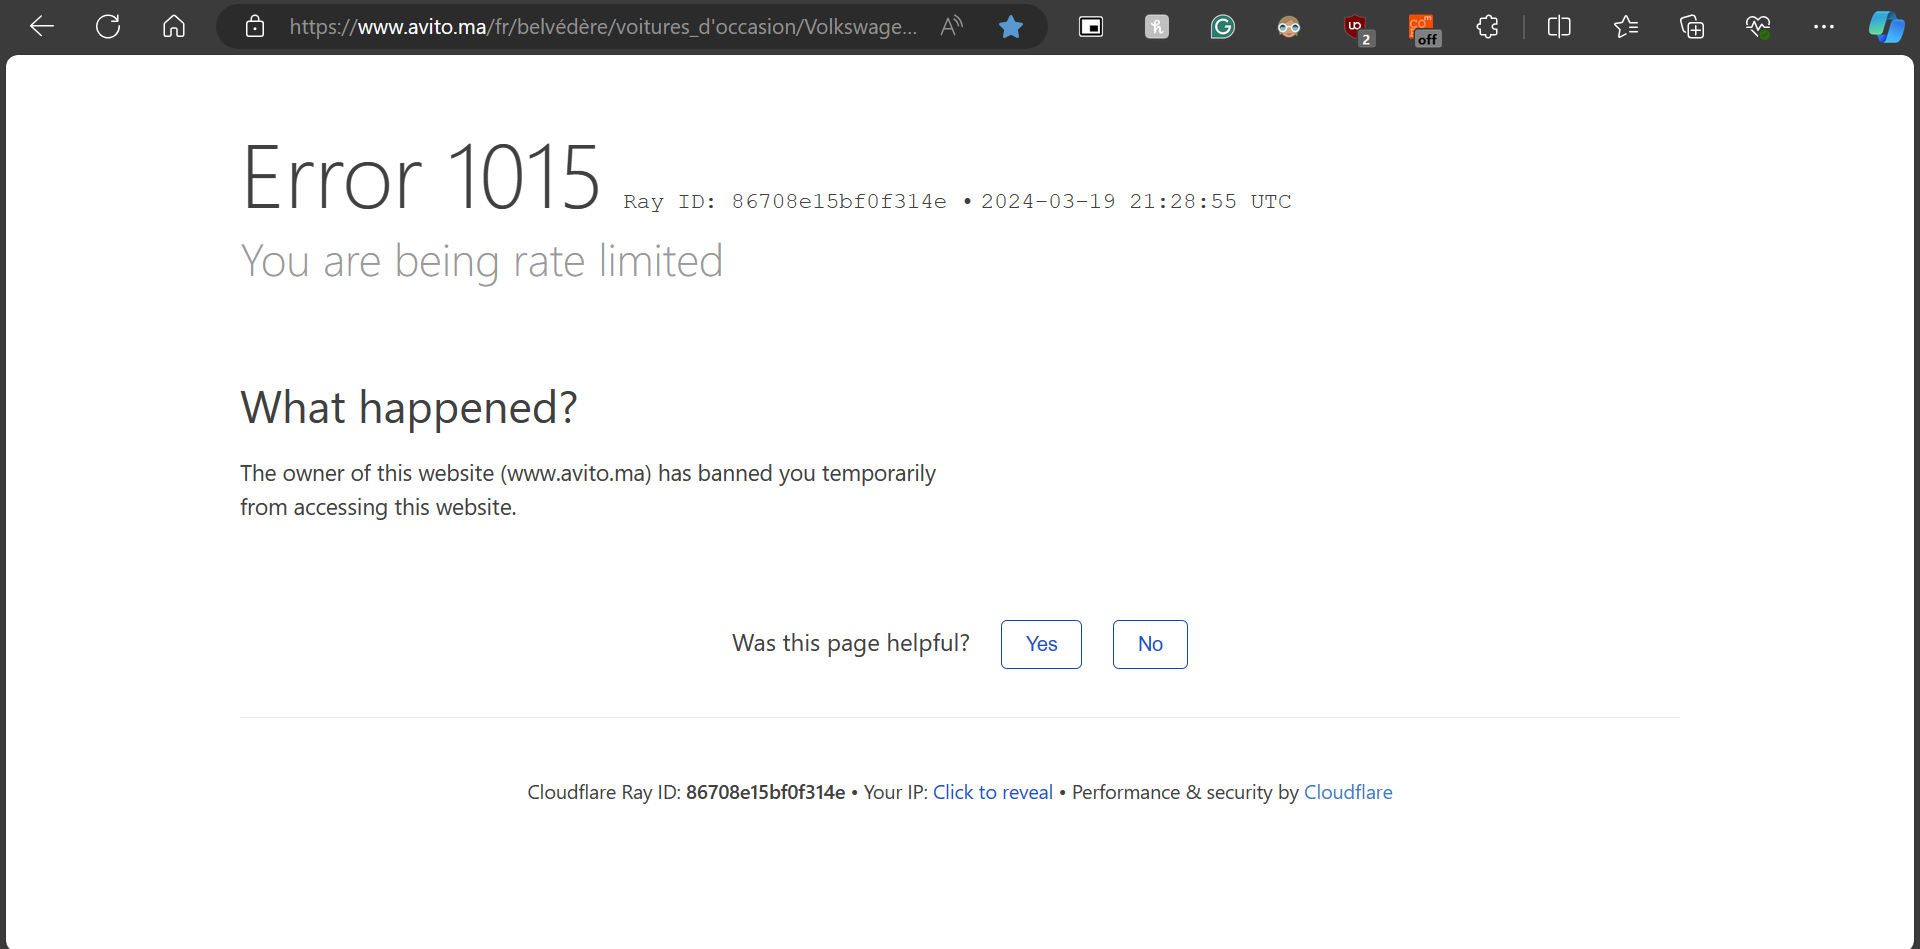

In [76]:
import random
for article_link in article_links:
    sleep(random.randint(5, 10)) # sleep for 5 to 10 seconds to avoid being blocked
    driver.get(article_link)
    try:
        Titre = driver.find_element(By.XPATH, '//div[@class="sc-1g3sn3w-9 kvOteU"]/h1').text
        Vendeur = driver.find_element(By.XPATH, '//p[@class="sc-1x0vz2r-0 fUTtTl sc-1l0do2b-9 bkvpcU"]').text
        Prix = driver.find_element(By.XPATH, '//div[@class="sc-1g3sn3w-10 leGvyq"]/p').text
        Ville = driver.find_element(By.XPATH, '//span[@class="sc-1x0vz2r-0 iotEHk"]').text
        infos = driver.find_elements(By.XPATH, '//span[@class="sc-1x0vz2r-0 kQHNss"]')
        infos = [info.text for info in infos]
        infos = driver.find_elements(By.XPATH, '//span[@class="sc-1x0vz2r-0 kQHNss"]')
        infos = [info.text for info in infos]
        Carburant = None
        Boite_à_vitesses = None
        Puissance_fiscale = None
        for info in infos:
            if 'Automatique' in info:
                Boite_à_vitesses = 'Automatique'
            elif 'Manuelle' in info:
                Boite_à_vitesses = 'Manuelle'

            if 'Essence' in info:
                Carburant = 'Essence'
            elif 'Diesel' in info:
                Carburant = 'Diesel'
            elif 'Hybride' in info:
                Carburant = 'Hybride'

            if 'CV' in info:
                Puissance_fiscale = info

        Nombre_des_images = driver.find_element(By.XPATH, '//p[@class="sc-1x0vz2r-0 gHEfHI sc-10jmm47-1 eLMGru"]').text
        other_infos_titles = driver.find_elements(By.XPATH, '//span[@class="sc-1x0vz2r-0 jZyObG"]')
        other_infos_titles = [info.text for info in other_infos_titles]

        other_infos_values = driver.find_elements(By.XPATH, '//span[@class="sc-1x0vz2r-0 gSLYtF"]')
        other_infos_values = [info.text for info in other_infos_values]

        other_infos = dict(zip(other_infos_titles, other_infos_values))

        Type = other_infos.get('Type', None)
        Secteur = other_infos.get('Secteur', None)
        Origine = other_infos.get('Origine', None)
        État = other_infos.get('État', None)
        Marque = other_infos.get('Marque', None)
        Modèle = other_infos.get('Modèle', None)
        Année_Modèle = other_infos.get('Année-Modèle', None)
        Nombre_de_portes = other_infos.get('Nombre de portes', None)
        Première_main = other_infos.get('Première main', None)
        Kilométrage = other_infos.get('Kilométrage', None)

        Equipements = driver.find_elements(By.XPATH, '//span[@class="sc-1x0vz2r-0 bXFCIH"]')
        Equipements = [info.text for info in Equipements]
        data = [Titre, Vendeur, Prix, Ville, Carburant, Boite_à_vitesses, Puissance_fiscale, Nombre_des_images, Type, Secteur, Origine, État, Marque, Modèle, Année_Modèle, Nombre_de_portes, Première_main, Kilométrage] + [Equipements]
        csv_writer.writerow(data)
        csv_file.flush()
    except:
        pass

WebDriverException: Message: disconnected: not connected to DevTools
  (failed to check if window was closed: disconnected: not connected to DevTools)
  (Session info: chrome=122.0.6261.128)
Stacktrace:
	GetHandleVerifier [0x00007FF627D14C82+3505170]
	(No symbol) [0x00007FF627940852]
	(No symbol) [0x00007FF6277F4145]
	(No symbol) [0x00007FF6277E191F]
	(No symbol) [0x00007FF6277E1490]
	(No symbol) [0x00007FF6277F6271]
	(No symbol) [0x00007FF627877A89]
	(No symbol) [0x00007FF62785BC33]
	(No symbol) [0x00007FF62782D618]
	(No symbol) [0x00007FF62782E6B1]
	GetHandleVerifier [0x00007FF627D467DD+3708781]
	GetHandleVerifier [0x00007FF627D9FC5D+4074477]
	GetHandleVerifier [0x00007FF627D97DDF+4042095]
	GetHandleVerifier [0x00007FF627A6A136+708806]
	(No symbol) [0x00007FF62794CB0F]
	(No symbol) [0x00007FF627947D14]
	(No symbol) [0x00007FF627947E6C]
	(No symbol) [0x00007FF6279379A4]
	BaseThreadInitThunk [0x00007FFE9485257D+29]
	RtlUserThreadStart [0x00007FFE94F6AA58+40]


<h3>Visualize our dataset:</h3>

In [78]:
dataset = pd.read_csv('avito_data.csv')
dataset

,Titre,Vendeur,Prix,Ville,Carburant,Boite à vitesses,Puissance Fiscale,Nombre des images,Type,Secteur,Origine,État,Marque,Modèle,Année-Modèle,Nombre de portes,Première main,Kilométrage,Equipements
0,Toyota Corolla Hybride Automatique 2019 à Tétouan,auto confort 44,205 000 DH,Tétouan,Hybride,Automatique,8 CV,9 Images,"Voitures d'occasion, à vendre",Safir,WW au Maroc,Neuf,Toyota,Corolla,2019,5.0,Non,50 000 - 54 999,"['Système De Navigation/GPS', 'Verrouillage Ce..."
1,Toyota Corolla Hybride Automatique 2019 à Tétouan,auto confort 44,205 000 DH,Tétouan,Hybride,Automatique,8 CV,9 Images,"Voitures d'occasion, à vendre",Safir,WW au Maroc,Neuf,Toyota,Corolla,2019,5.0,Non,50 000 - 54 999,"['Ordinateur De Bord', 'Régulateur De Vitesse'..."
2,Transport des denrées périssables,FROZEN carosserie frigorifique,1 DH,Casablanca,Diesel,Manuelle,6 CV,6 Images,"Voitures d'occasion, à vendre",Aïn Chock,WW au Maroc,Très bon,Renault,express_van,2023,5.0,Oui,5 000 - 9 999,"['Sièges Cuir', 'Ordinateur De Bord', 'Caméra ..."
3,Jeep CJ 5 Diesel Manuelle 1990 à Fès,yassine,PRIX NON SPÉCIFIÉ,Fès,Diesel,Manuelle,7 CV,6 Images,"Voitures d'occasion, à vendre",Saies,Dédouanée,Excellent,Jeep,CJ5,1990,3.0,Non,25 000 - 29 999,"['Sièges Cuir', 'Jantes Aluminium', 'CD/MP3/Bl..."
4,Range Rover Sport Autobiographie Pack SVR,AUTO REDA,680 000 DH,Casablanca,Diesel,Automatique,12 CV,13 Images,"Voitures d'occasion, à vendre",Maarif,NaN,Excellent,Land Rover,Range Rover Sport,2020,5.0,Oui,80 000 - 84 999,"['ESP', 'Caméra De Recul', 'Limiteur De Vitess..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3133,Jaguar F-Pace Diesel Automatique 2018,Smeia - BMW Occasion,311 000 DH,Casablanca,Diesel,Automatique,8 CV,8 Images,"Voitures d'occasion, à vendre",Ain Sebaa,WW au Maroc,Excellent,Jaguar,F-PACE,2018,5.0,Oui,100 000 - 109 999,"['Verrouillage Centralisé À Distance', 'Limite..."
3134,Volkswagen Tiguan Diesel Manuelle 2012 à Meknès,Garage autoouzi,PRIX NON SPÉCIFIÉ,Meknès,Diesel,Manuelle,8 CV,8 Images,"Voitures d'occasion, à vendre",Hamria,Dédouanée,Excellent,Volkswagen,Tiguan,2012,3.0,Oui,200 000 - 249 999,"['Système De Navigation/GPS', 'Radar De Recul'..."
3135,Ford Focus Diesel Manuelle 2011 à Tétouan,NaN,PRIX NON SPÉCIFIÉ,Tétouan,Diesel,Manuelle,7 CV,9 Images,"Voitures d'occasion, à vendre",Centre ville,WW au Maroc,Excellent,Ford,Focus,2011,5.0,Non,130 000 - 139 999,"['Jantes Aluminium', 'Airbags', 'Climatisation']"
3136,Seat Arona Essence Automatique 2023 à Casablanca,NaN,PRIX NON SPÉCIFIÉ,Casablanca,Essence,Automatique,7 CV,10 Images,"Voitures d'occasion, à vendre",Belvédère,WW au Maroc,Excellent,Seat,Arona,2023,5.0,Oui,5 000 - 9 999,"['Limiteur De Vitesse', 'Jantes Aluminium', 'S..."


<h5>Our dataset contains 3137 rows of data!</h5>

In [79]:
csv_file.close()
driver.quit()